In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = ".\\data\\"
BF_df_CTU = pd.read_parquet(path +"BF_df_CTU.parquet")
#BF_df_OU = pd.read_feather("BF_df_OU.feather")
BF_df_V = pd.read_parquet(path +"BF_df_V.parquet")
#DT_df_CC = pd.read_feather("DT_df_CC.feather")
#DT_df_JI = pd.read_feather("DT_df_JI.feather")
#IADQ_df = pd.read_feather("IADQ_df.feather")
IESR_df = pd.read_parquet(path +"IESR_df.parquet")
#NAQ_R_df = pd.read_feather("NAQ_R_df.feather")
PCL5_df = pd.read_parquet(path +"PCL5_df.parquet")
PHQ9_GAD7_df = pd.read_parquet(path +"PHQ9_GAD7_df.parquet")
#PID5_df = pd.read_feather("PID5_df.feather")
#PRFQ_df = pd.read_feather("PRFQ_df.feather")
PRMQ_df = pd.read_parquet(path +"PRMQ_df.parquet")
#R_NEO_PI = pd.read_feather("R_NEO_PI.feather")
#RAW_DDDT = pd.read_feather("RAW_DDDT.feather")
#sPID_5_df = pd.read_feather("sPID-5_df.feather")

In [5]:
dfs = [BF_df_CTU, BF_df_V, IESR_df, PCL5_df, PHQ9_GAD7_df, PRMQ_df]

In [ ]:
# dfs_2 = [BF_df_CTU, BF_df_OU, BF_df_V, DT_df_CC, DT_df_JI, IADQ_df, IESR_df, NAQ_R_df, PCL5_df, PHQ9_GAD7_df, PID5_df, PRFQ_df, PRMQ_df, R_NEO_PI, RAW_DDDT, sPID_5_df]

In [6]:
dfs_names = ['BF_df_CTU', 'BF_df_V', 'IESR_df', 'PCL5_df', 'PHQ9_GAD7_df','PRMQ_df']

In [7]:
for i in dfs:
    n, p = i.shape
    print(n, p)

442 11
486 11
358 23
402 21
1118 17
1404 17


In [8]:
dataframe_list = []
for i in dfs:
    i['CONDITION'] = i['CONDITION'].replace(['H', 'D', 'HONEST', 'DISHONEST', 'FAKE'], ['1', '0', '1', '0', '0'])
    temp = (i[i['CONDITION'] == "1"].iloc[:, :-1] - i[i['CONDITION'] == "0"].iloc[:, :-1].reset_index()).iloc[:, :-1]
    dataframe_list.append(temp)


In [9]:
def custom_loss(y_true, y_pred):
    loss = tf.norm(y_true-y_pred, ord=1)
    return loss

In [10]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

columns = {}
for df, name in zip(dataframe_list, dfs_names):
    model = keras.Sequential([
        keras.Input(shape=(len(df.columns),)),
        keras.layers.Dense(1, use_bias=False)
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)
    y = []
    for _ in range(len(df)):
    y.append(10.)
    
    model.fit(np.asarray(df).astype(np.float64), np.asarray(y).astype(np.float64) , epochs = 500)
    w_index_value = {}
    for i, x in enumerate(model.get_weights()[0]):
        w_index_value[i] = x[0]

    w_index_value = {k: v for k, v in sorted(w_index_value.items(), key=lambda item: abs(item[1]), reverse=True)}
    columns[name] = w_index_value

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 389.4434
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 388.2199
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 386.1042
Epoch 4/500
7/7 [==============================] - 0s 997us/step - loss: 385.1289
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 383.4962
Epoch 6/500
7/7 [==============================] - 0s 1ms/step - loss: 381.6562
Epoch 7/500
7/7 [==============================] - 0s 1ms/step - loss: 380.5072
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 378.7929
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 377.5053
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 375.8939
Epoch 11/500
7/7 [==============================] - 0s 1ms/step - loss: 374.5273
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 372.9546
Epoch 13/500
7/7 [=================

7/7 [==============================] - 0s 1ms/step - loss: 245.0085
Epoch 103/500
7/7 [==============================] - 0s 1ms/step - loss: 243.3045
Epoch 104/500
7/7 [==============================] - 0s 1ms/step - loss: 242.2280
Epoch 105/500
7/7 [==============================] - 0s 1ms/step - loss: 240.9412
Epoch 106/500
7/7 [==============================] - 0s 1ms/step - loss: 239.4624
Epoch 107/500
7/7 [==============================] - 0s 1ms/step - loss: 237.7752
Epoch 108/500
7/7 [==============================] - 0s 1ms/step - loss: 236.6145
Epoch 109/500
7/7 [==============================] - 0s 1ms/step - loss: 235.2120
Epoch 110/500
7/7 [==============================] - 0s 1ms/step - loss: 233.4333
Epoch 111/500
7/7 [==============================] - 0s 1ms/step - loss: 232.5553
Epoch 112/500
7/7 [==============================] - 0s 1ms/step - loss: 231.0582
Epoch 113/500
7/7 [==============================] - 0s 831us/step - loss: 229.5779
Epoch 114/500
7/7 [=========

7/7 [==============================] - 0s 1ms/step - loss: 153.5395
Epoch 301/500
7/7 [==============================] - 0s 992us/step - loss: 153.3171
Epoch 302/500
7/7 [==============================] - 0s 997us/step - loss: 153.5126
Epoch 303/500
7/7 [==============================] - 0s 1ms/step - loss: 153.6537
Epoch 304/500
7/7 [==============================] - 0s 997us/step - loss: 153.8762
Epoch 305/500
7/7 [==============================] - 0s 1ms/step - loss: 154.0508
Epoch 306/500
7/7 [==============================] - 0s 1ms/step - loss: 153.8486
Epoch 307/500
7/7 [==============================] - 0s 997us/step - loss: 153.1828
Epoch 308/500
7/7 [==============================] - 0s 1ms/step - loss: 153.9352
Epoch 309/500
7/7 [==============================] - 0s 2ms/step - loss: 153.5337
Epoch 310/500
7/7 [==============================] - 0s 1ms/step - loss: 153.4354
Epoch 311/500
7/7 [==============================] - 0s 1ms/step - loss: 152.8742
Epoch 312/500
7/7 [===

7/7 [==============================] - 0s 997us/step - loss: 147.8240
Epoch 499/500
7/7 [==============================] - 0s 1ms/step - loss: 147.6000
Epoch 500/500
7/7 [==============================] - 0s 1ms/step - loss: 147.4321
Epoch 1/500
8/8 [==============================] - 0s 1ms/step - loss: 311.9675
Epoch 2/500
8/8 [==============================] - 0s 1ms/step - loss: 310.1346
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 308.6916
Epoch 4/500
8/8 [==============================] - 0s 997us/step - loss: 306.7079
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 305.5790
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 303.6104
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 301.8542
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 300.0364
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 298.5122
Epoch 10/500
8/8 [==========================

8/8 [==============================] - 0s 1ms/step - loss: 181.9777
Epoch 100/500
8/8 [==============================] - 0s 2ms/step - loss: 181.8899
Epoch 101/500
8/8 [==============================] - 0s 1ms/step - loss: 180.8082
Epoch 102/500
8/8 [==============================] - 0s 1ms/step - loss: 180.8050
Epoch 103/500
8/8 [==============================] - 0s 1ms/step - loss: 180.5075
Epoch 104/500
8/8 [==============================] - 0s 1ms/step - loss: 179.3426
Epoch 105/500
8/8 [==============================] - 0s 1ms/step - loss: 180.5815
Epoch 106/500
8/8 [==============================] - 0s 1ms/step - loss: 178.7615
Epoch 107/500
8/8 [==============================] - 0s 1ms/step - loss: 178.5118
Epoch 108/500
8/8 [==============================] - 0s 1ms/step - loss: 177.7556
Epoch 109/500
8/8 [==============================] - 0s 1ms/step - loss: 178.7308
Epoch 110/500
8/8 [==============================] - 0s 1ms/step - loss: 178.6547
Epoch 111/500
8/8 [===========

8/8 [==============================] - 0s 998us/step - loss: 157.2729
Epoch 298/500
8/8 [==============================] - 0s 1ms/step - loss: 158.2318
Epoch 299/500
8/8 [==============================] - 0s 997us/step - loss: 160.2209
Epoch 300/500
8/8 [==============================] - 0s 1ms/step - loss: 159.7747
Epoch 301/500
8/8 [==============================] - 0s 1ms/step - loss: 158.7277
Epoch 302/500
8/8 [==============================] - 0s 1ms/step - loss: 159.3540
Epoch 303/500
8/8 [==============================] - 0s 1ms/step - loss: 157.4079
Epoch 304/500
8/8 [==============================] - 0s 2ms/step - loss: 159.4848
Epoch 305/500
8/8 [==============================] - 0s 1ms/step - loss: 159.4544
Epoch 306/500
8/8 [==============================] - 0s 1ms/step - loss: 158.7364
Epoch 307/500
8/8 [==============================] - 0s 1ms/step - loss: 158.0809
Epoch 308/500
8/8 [==============================] - 0s 1ms/step - loss: 159.0084
Epoch 309/500
8/8 [=======

8/8 [==============================] - 0s 1ms/step - loss: 155.3299
Epoch 496/500
8/8 [==============================] - 0s 1ms/step - loss: 157.5493
Epoch 497/500
8/8 [==============================] - 0s 2ms/step - loss: 157.9036
Epoch 498/500
8/8 [==============================] - 0s 1ms/step - loss: 155.8793
Epoch 499/500
8/8 [==============================] - 0s 1ms/step - loss: 154.6088
Epoch 500/500
8/8 [==============================] - 0s 1ms/step - loss: 156.7461
Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 328.3797
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 321.4545
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 314.1061
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 305.3523
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 297.0597
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 289.4692
Epoch 7/500
6/6 [=========================

6/6 [==============================] - 0s 1ms/step - loss: 90.4362
Epoch 98/500
6/6 [==============================] - 0s 1ms/step - loss: 89.4946
Epoch 99/500
6/6 [==============================] - 0s 1ms/step - loss: 89.3557
Epoch 100/500
6/6 [==============================] - 0s 1ms/step - loss: 87.8695
Epoch 101/500
6/6 [==============================] - 0s 1ms/step - loss: 89.1065
Epoch 102/500
6/6 [==============================] - 0s 2ms/step - loss: 88.1285
Epoch 103/500
6/6 [==============================] - 0s 2ms/step - loss: 89.3574
Epoch 104/500
6/6 [==============================] - 0s 2ms/step - loss: 89.1703
Epoch 105/500
6/6 [==============================] - 0s 997us/step - loss: 89.0928
Epoch 106/500
6/6 [==============================] - 0s 1ms/step - loss: 88.3815
Epoch 107/500
6/6 [==============================] - 0s 1ms/step - loss: 89.0263
Epoch 108/500
6/6 [==============================] - 0s 997us/step - loss: 90.2365
Epoch 109/500
6/6 [=====================

6/6 [==============================] - 0s 1ms/step - loss: 84.5852
Epoch 199/500
6/6 [==============================] - 0s 1ms/step - loss: 83.9028
Epoch 200/500
6/6 [==============================] - 0s 997us/step - loss: 83.4122
Epoch 201/500
6/6 [==============================] - 0s 2ms/step - loss: 82.6083
Epoch 202/500
6/6 [==============================] - 0s 1ms/step - loss: 81.4087
Epoch 203/500
6/6 [==============================] - 0s 1ms/step - loss: 84.3365
Epoch 204/500
6/6 [==============================] - 0s 997us/step - loss: 83.7824
Epoch 205/500
6/6 [==============================] - 0s 1ms/step - loss: 84.1569
Epoch 206/500
6/6 [==============================] - 0s 1ms/step - loss: 82.2245
Epoch 207/500
6/6 [==============================] - 0s 1ms/step - loss: 81.9675
Epoch 208/500
6/6 [==============================] - 0s 990us/step - loss: 82.9276
Epoch 209/500
6/6 [==============================] - 0s 1ms/step - loss: 84.0420
Epoch 210/500
6/6 [=================

6/6 [==============================] - 0s 1ms/step - loss: 79.5135
Epoch 300/500
6/6 [==============================] - 0s 1ms/step - loss: 79.9355
Epoch 301/500
6/6 [==============================] - 0s 2ms/step - loss: 79.8247
Epoch 302/500
6/6 [==============================] - 0s 2ms/step - loss: 80.6458
Epoch 303/500
6/6 [==============================] - 0s 1ms/step - loss: 81.1396
Epoch 304/500
6/6 [==============================] - 0s 1ms/step - loss: 80.2519
Epoch 305/500
6/6 [==============================] - 0s 1ms/step - loss: 80.1251
Epoch 306/500
6/6 [==============================] - 0s 2ms/step - loss: 80.2484
Epoch 307/500
6/6 [==============================] - 0s 1ms/step - loss: 79.6713
Epoch 308/500
6/6 [==============================] - 0s 1ms/step - loss: 80.6810
Epoch 309/500
6/6 [==============================] - 0s 1ms/step - loss: 80.7752
Epoch 310/500
6/6 [==============================] - 0s 2ms/step - loss: 81.3696
Epoch 311/500
6/6 [=======================

6/6 [==============================] - 0s 2ms/step - loss: 78.8768
Epoch 401/500
6/6 [==============================] - 0s 1ms/step - loss: 80.0007
Epoch 402/500
6/6 [==============================] - 0s 2ms/step - loss: 80.8795
Epoch 403/500
6/6 [==============================] - 0s 2ms/step - loss: 79.3847
Epoch 404/500
6/6 [==============================] - 0s 1ms/step - loss: 78.2409
Epoch 405/500
6/6 [==============================] - 0s 1ms/step - loss: 79.7475
Epoch 406/500
6/6 [==============================] - 0s 2ms/step - loss: 80.0597
Epoch 407/500
6/6 [==============================] - 0s 1ms/step - loss: 77.3791
Epoch 408/500
6/6 [==============================] - 0s 1ms/step - loss: 77.4179
Epoch 409/500
6/6 [==============================] - 0s 2ms/step - loss: 79.4793
Epoch 410/500
6/6 [==============================] - 0s 2ms/step - loss: 78.8771
Epoch 411/500
6/6 [==============================] - 0s 1ms/step - loss: 79.5036
Epoch 412/500
6/6 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 152.7746
Epoch 103/500
7/7 [==============================] - 0s 1ms/step - loss: 153.3553
Epoch 104/500
7/7 [==============================] - 0s 997us/step - loss: 150.5473
Epoch 105/500
7/7 [==============================] - 0s 2ms/step - loss: 152.1114
Epoch 106/500
7/7 [==============================] - 0s 1ms/step - loss: 150.3271
Epoch 107/500
7/7 [==============================] - 0s 1ms/step - loss: 150.5786
Epoch 108/500
7/7 [==============================] - 0s 2ms/step - loss: 151.9257
Epoch 109/500
7/7 [==============================] - 0s 2ms/step - loss: 152.4637
Epoch 110/500
7/7 [==============================] - 0s 1ms/step - loss: 150.1761
Epoch 111/500
7/7 [==============================] - 0s 1ms/step - loss: 152.1556
Epoch 112/500
7/7 [==============================] - 0s 2ms/step - loss: 151.9055
Epoch 113/500
7/7 [==============================] - 0s 2ms/step - loss: 150.9832
Epoch 114/500
7/7 [=========

Epoch 301/500
7/7 [==============================] - 0s 1ms/step - loss: 144.3920
Epoch 302/500
7/7 [==============================] - 0s 997us/step - loss: 142.1859
Epoch 303/500
7/7 [==============================] - 0s 2ms/step - loss: 141.4430
Epoch 304/500
7/7 [==============================] - 0s 1ms/step - loss: 141.3320
Epoch 305/500
7/7 [==============================] - 0s 1ms/step - loss: 145.2165
Epoch 306/500
7/7 [==============================] - 0s 1ms/step - loss: 142.5256
Epoch 307/500
7/7 [==============================] - 0s 1ms/step - loss: 145.2525
Epoch 308/500
7/7 [==============================] - 0s 1ms/step - loss: 141.9276
Epoch 309/500
7/7 [==============================] - 0s 1ms/step - loss: 142.4859
Epoch 310/500
7/7 [==============================] - 0s 1ms/step - loss: 142.4986
Epoch 311/500
7/7 [==============================] - 0s 1ms/step - loss: 143.1133
Epoch 312/500
7/7 [==============================] - 0s 1ms/step - loss: 142.9214
Epoch 313/500


7/7 [==============================] - 0s 2ms/step - loss: 139.6157
Epoch 500/500
7/7 [==============================] - 0s 998us/step - loss: 136.0728
Epoch 1/500
18/18 [==============================] - 0s 1ms/step - loss: 211.0644
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 192.4612
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 173.0359
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 154.7624
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 137.3143
Epoch 6/500
18/18 [==============================] - 0s 997us/step - loss: 123.5728
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 112.2102
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 104.8064
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 99.8397
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 97.6187
Epoch 11/500
18/18 [=======

18/18 [==============================] - 0s 2ms/step - loss: 64.4144
Epoch 197/500
18/18 [==============================] - 0s 2ms/step - loss: 64.3581
Epoch 198/500
18/18 [==============================] - 0s 1ms/step - loss: 64.2721
Epoch 199/500
18/18 [==============================] - 0s 1ms/step - loss: 64.3458
Epoch 200/500
18/18 [==============================] - 0s 1ms/step - loss: 64.5726
Epoch 201/500
18/18 [==============================] - 0s 1ms/step - loss: 64.4220
Epoch 202/500
18/18 [==============================] - 0s 1ms/step - loss: 64.3645
Epoch 203/500
18/18 [==============================] - 0s 1ms/step - loss: 64.3562
Epoch 204/500
18/18 [==============================] - 0s 1ms/step - loss: 64.3438
Epoch 205/500
18/18 [==============================] - 0s 1ms/step - loss: 64.5134
Epoch 206/500
18/18 [==============================] - 0s 1ms/step - loss: 64.2678
Epoch 207/500
18/18 [==============================] - 0s 1ms/step - loss: 64.4481
Epoch 208/500
18/1

18/18 [==============================] - 0s 1ms/step - loss: 63.5574
Epoch 393/500
18/18 [==============================] - 0s 1ms/step - loss: 63.6697
Epoch 394/500
18/18 [==============================] - 0s 2ms/step - loss: 63.4922
Epoch 395/500
18/18 [==============================] - 0s 1ms/step - loss: 63.6124
Epoch 396/500
18/18 [==============================] - 0s 1ms/step - loss: 64.0193
Epoch 397/500
18/18 [==============================] - 0s 1ms/step - loss: 63.8024
Epoch 398/500
18/18 [==============================] - 0s 1ms/step - loss: 63.5164
Epoch 399/500
18/18 [==============================] - 0s 1ms/step - loss: 63.9356
Epoch 400/500
18/18 [==============================] - 0s 1ms/step - loss: 63.7070
Epoch 401/500
18/18 [==============================] - 0s 1ms/step - loss: 63.4213
Epoch 402/500
18/18 [==============================] - 0s 1ms/step - loss: 63.5649
Epoch 403/500
18/18 [==============================] - 0s 1ms/step - loss: 63.6496
Epoch 404/500
18/1

22/22 [==============================] - 0s 809us/step - loss: 112.8317
Epoch 88/500
22/22 [==============================] - 0s 950us/step - loss: 112.6731
Epoch 89/500
22/22 [==============================] - 0s 855us/step - loss: 112.5401
Epoch 90/500
22/22 [==============================] - 0s 855us/step - loss: 112.2490
Epoch 91/500
22/22 [==============================] - 0s 952us/step - loss: 112.1363
Epoch 92/500
22/22 [==============================] - 0s 855us/step - loss: 112.0985
Epoch 93/500
22/22 [==============================] - 0s 855us/step - loss: 111.8948
Epoch 94/500
22/22 [==============================] - 0s 854us/step - loss: 111.6879
Epoch 95/500
22/22 [==============================] - 0s 855us/step - loss: 111.5763
Epoch 96/500
22/22 [==============================] - 0s 868us/step - loss: 111.4275
Epoch 97/500
22/22 [==============================] - 0s 855us/step - loss: 111.2776
Epoch 98/500
22/22 [==============================] - 0s 914us/step - loss: 11

22/22 [==============================] - 0s 809us/step - loss: 106.4823
Epoch 278/500
22/22 [==============================] - 0s 808us/step - loss: 106.4844
Epoch 279/500
22/22 [==============================] - 0s 785us/step - loss: 106.5114
Epoch 280/500
22/22 [==============================] - 0s 758us/step - loss: 106.3931
Epoch 281/500
22/22 [==============================] - 0s 809us/step - loss: 106.3858
Epoch 282/500
22/22 [==============================] - 0s 807us/step - loss: 106.4887
Epoch 283/500
22/22 [==============================] - 0s 807us/step - loss: 106.5033
Epoch 284/500
22/22 [==============================] - 0s 854us/step - loss: 106.4109
Epoch 285/500
22/22 [==============================] - 0s 855us/step - loss: 106.4366
Epoch 286/500
22/22 [==============================] - 0s 853us/step - loss: 106.4371
Epoch 287/500
22/22 [==============================] - 0s 856us/step - loss: 106.4390
Epoch 288/500
22/22 [==============================] - 0s 855us/step

22/22 [==============================] - 0s 807us/step - loss: 106.3326
Epoch 468/500
22/22 [==============================] - 0s 836us/step - loss: 106.4540
Epoch 469/500
22/22 [==============================] - 0s 855us/step - loss: 106.4275
Epoch 470/500
22/22 [==============================] - 0s 855us/step - loss: 106.4054
Epoch 471/500
22/22 [==============================] - 0s 807us/step - loss: 106.3316
Epoch 472/500
22/22 [==============================] - 0s 807us/step - loss: 106.3979
Epoch 473/500
22/22 [==============================] - 0s 855us/step - loss: 106.3643
Epoch 474/500
22/22 [==============================] - 0s 808us/step - loss: 106.3574
Epoch 475/500
22/22 [==============================] - 0s 807us/step - loss: 106.5059
Epoch 476/500
22/22 [==============================] - 0s 756us/step - loss: 106.3466
Epoch 477/500
22/22 [==============================] - 0s 807us/step - loss: 106.3799
Epoch 478/500
22/22 [==============================] - 0s 855us/step

In [14]:
columns_reduced = {}
for name, index_list in columns.items():
    index_red = []
    for ix, weight in index_list.items(): 
        index_red.append(ix)
    #if abs(weight) >= 0.40:
    #    index_red.append(ix
        if len(index_red) >= len(index_list)/3:
            break
        columns_reduced[name] = index_red

In [15]:
columns_reduced

{'BF_df_CTU': [4, 6, 0, 2],
 'BF_df_V': [5, 6, 2, 4],
 'IESR_df': [10, 19, 3, 4, 8, 5, 11, 18],
 'PCL5_df': [15, 5, 3, 17, 6, 11, 19],
 'PHQ9_GAD7_df': [14, 13, 8, 3, 7, 12],
 'PRMQ_df': [10, 12, 2, 3, 9, 6]}

### Accuracy of complete datasets

In [16]:
def complete_ds_acc(dfs, dfs_names, data):
    for i in range(len(dfs)):
        
        X = dfs[i].iloc[:,:-1]
        y = dfs[i].iloc[:,-1]
        center_function = lambda x: x - x.mean()
        X = center_function(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # LOGISTIC REGRESSION
        lr = LogisticRegression(C=0.01, random_state=42)
        lr.fit(X_train, y_train)
        y_lr_pred = lr.predict(X_test)
        acc_lr = accuracy_score(y_test, y_lr_pred)

        # RANDOM FOREST
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
        y_rf_pred = rf.predict(X_test)
        acc_rf = accuracy_score(y_test, y_rf_pred)

        #SVM
        svm = LinearSVC(loss='hinge',random_state=42, max_iter = 100000)
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        acc_svm = accuracy_score(y_pred_svm,y_test)

        data[dfs_names[i]] = [acc_lr,acc_rf, acc_svm]

        
    return data

In [17]:
dic_acc = {}
results_acc = complete_ds_acc(dfs, dfs_names, dic_acc)
acc_df = pd.DataFrame(results_acc)
acc_df.round(3)

,BF_df_CTU,BF_df_V,IESR_df,PCL5_df,PHQ9_GAD7_df,PRMQ_df
0,0.797,0.740,0.963,0.835,0.988,0.912
1,0.827,0.747,0.907,0.843,0.982,0.931
2,0.805,0.733,0.898,0.851,0.985,0.903


In [18]:
mean_acc_df = acc_df.mean()
mean_acc_df

BF_df_CTU       0.809524
BF_df_V         0.739726
IESR_df         0.922840
PCL5_df         0.842975
PHQ9_GAD7_df    0.985119
PRMQ_df         0.915482
dtype: float64

In [19]:
data_reduce = []
for df, name in zip(dfs, dfs_names):
    columns_reduced[name].append(-1)
    data_reduce.append(df.iloc[:, columns_reduced[name]])

In [20]:
dic_acc = {}
results_acc = complete_ds_acc(data_reduce, dfs_names, dic_acc)
acc_df = pd.DataFrame(results_acc)
acc_df.round(3)

,BF_df_CTU,BF_df_V,IESR_df,PCL5_df,PHQ9_GAD7_df,PRMQ_df
0,0.789,0.753,0.926,0.818,0.958,0.834
1,0.835,0.747,0.898,0.752,0.961,0.872
2,0.797,0.753,0.907,0.860,0.955,0.829


In [21]:
mean_acc_df = acc_df.mean()
mean_acc_df

BF_df_CTU       0.807018
BF_df_V         0.751142
IESR_df         0.910494
PCL5_df         0.809917
PHQ9_GAD7_df    0.958333
PRMQ_df         0.845182
dtype: float64

In [22]:
columns_reduced

{'BF_df_CTU': [4, 6, 0, 2, -1],
 'BF_df_V': [5, 6, 2, 4, -1],
 'IESR_df': [10, 19, 3, 4, 8, 5, 11, 18, -1],
 'PCL5_df': [15, 5, 3, 17, 6, 11, 19, -1],
 'PHQ9_GAD7_df': [14, 13, 8, 3, 7, 12, -1],
 'PRMQ_df': [10, 12, 2, 3, 9, 6, -1]}

### Mann-Whitney U test

In [23]:
### soglia 0.01 o 0.05 ? 


for i in range(len(dfs)):
    n, p = dfs[i].shape
    print(p-1)
    X_honest = dfs[i][dfs[i]['CONDITION'] == '1'].iloc[:, :-1]
    X_dishonest = dfs[i][dfs[i]['CONDITION'] == '0'].iloc[:, :-1]
    indices = []
    for k in range(0, (p-1)):
        U1, s = mannwhitneyu(X_honest.iloc[:, k], X_dishonest.iloc[:, k])
        if s < 0.01:
            indices.append(k)
    print(len(indices))
    print(' ')

10
8
 
10
9
 
22
21
 
20
20
 
16
16
 
16
16
 


In [24]:
def new_mwu_data(dfs):
    for i in range(len(dfs)):
        n, p = dfs[i].shape
        X_honest = dfs[i][dfs[i]['CONDITION'] == '1'].iloc[:, :-1]
        X_dishonest = dfs[i][dfs[i]['CONDITION'] == '0'].iloc[:, :-1]
        indices = []
        for k in range(0, (p-1)):
            U1, s = mannwhitneyu(X_honest.iloc[:, k], X_dishonest.iloc[:, k])
            if s < 0.01:
                indices.append(k)
        indices.append(-1)
        dfs[i] = dfs[i].iloc[:, indices]
        print(dfs[i])

In [25]:
new_mwu_data(dfs)

     EX1G  A1G  A2G  C1G  C2G  ES1G  ES2G  O2G CONDITION
0       4    4    4    4    5     4     4    4         1
1       4    2    4    4    5     3     4    4         1
2       4    2    4    4    4     3     4    4         1
3       4    2    4    2    4     5     5    2         1
4       3    3    4    5    5     4     4    5         1
..    ...  ...  ...  ...  ...   ...   ...  ...       ...
437     4    3    3    5    5     3     4    4         0
438     4    4    4    5    4     5     4    4         0
439     4    4    4    5    5     4     4    5         0
440     4    3    4    5    5     5     4    4         0
441     5    4    3    5    5     5     5    4         0

[442 rows x 9 columns]
     EX1G  EX2G  A1G  C1G  C2G  ES1G  ES2G  O1G  O2G CONDITION
0       4     4    4    5    5     4     4    4    5         1
1       4     3    3    4    4     3     3    3    5         1
2       4     4    2    2    5     4     3    2    1         1
3       4     4    2    2    5     4    

### PCA plots

[0.35474923 0.13560575 0.10520792 0.08881985 0.07868395]


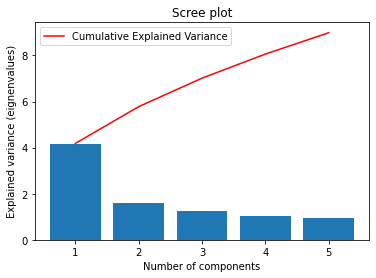

[0.36039243 0.12621939 0.11882242 0.08839938 0.07792358]


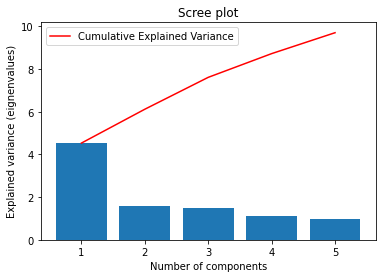

[0.68261088 0.04066235]


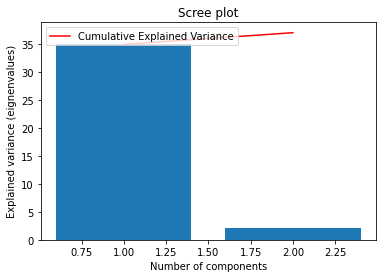

[0.65526556 0.05371404]


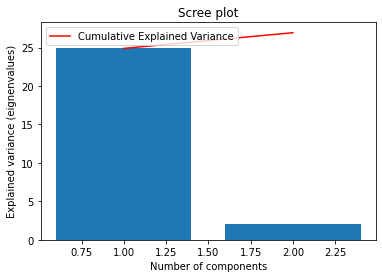

[0.65351624 0.05593097]


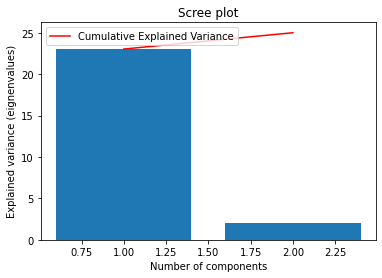

[0.61566447 0.05633069 0.03502169]


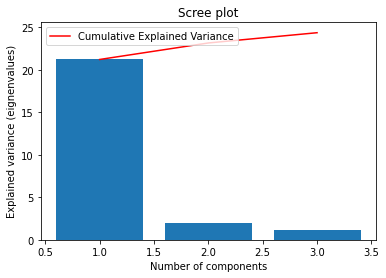

In [ ]:
for i in dfs:
    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]
    center_function = lambda x: x - x.mean()
    X = center_function(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pca = PCA(0.70)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    print(pca.explained_variance_ratio_)
    plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
    plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
    plt.legend(loc='upper left')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance (eignenvalues)')
    plt.title('Scree plot')
 
    plt.show()

### Accuracy of datasets after PCA

In [ ]:
def pca_ds_acc(dfs,dfs_names,data):
    for i in range(len(dfs)):
        
        X = dfs[i].iloc[:,:-1]
        y = dfs[i].iloc[:,-1]
        center_function = lambda x: x - x.mean()
        X = center_function(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        pca = PCA(0.70)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        n_pcs= pca.components_.shape[0]
        pca_comp = [abs(pca.components_[x]) for x in range(n_pcs)]
        pca_comp = [list(pca_comp[l]) for l in range(n_pcs)]
        pca_comp_sort = [sorted(pca_comp[p])[-3:] for p in range(n_pcs)]

        most_important_index = []
        for k in range(len(pca_comp_sort)):
          for j in range(len(pca_comp_sort[k])):
            most_important_index.append(pca_comp[k].index(pca_comp_sort[k][j]))
        
        initial_feature_names = dfs[i].columns
        most_important_index = list(set(most_important_index))
        most_important_names = [initial_feature_names[most_important_index[q]] for q in range(len(most_important_index))]
        
        sub_col = list(most_important_names)
        sub_col.append("CONDITION")
        df_5 = dfs[i][sub_col]    
        print(dfs_names[i])
        print([dfs[i].columns.get_loc(sub_col[j]) for j in range(len(sub_col))])

        X_sub = df_5.iloc[:,:-1]
        y_sub = df_5.iloc[:,-1]
        X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)

        # LOGISTIC REGRESSION
        lr = LogisticRegression(C=0.01, random_state=42)
        lr.fit(X_sub_train, y_train)
        y_lr_pred = lr.predict(X_sub_test)
        acc_lr = accuracy_score(y_test, y_lr_pred)
        #feture importance LR 
        importances = pd.DataFrame(data={
            'Attribute': X_sub_train.columns,
            'Importance': lr.coef_[0]
        })
        importances = importances.sort_values(by='Importance', ascending=False)
        plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
        plt.title('Feature importances obtained from coefficients- LOGISTIC REGRESSION', size=20)
        plt.xticks(rotation='vertical')
        plt.show()

        # RANDOM FOREST
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_sub_train, y_train)
        y_rf_pred = rf.predict(X_sub_test)
        acc_rf = accuracy_score(y_test, y_rf_pred)
        #feture importance RF
        importance = rf.feature_importances_

        print(pd.DataFrame(np.c_[X_sub_train.columns, rf.feature_importances_],
                          columns = ["Feature", "Importance"]).sort_values("Importance", ascending = False))
        plt.bar(X_sub_train.columns, importance)
        plt.xticks(rotation='vertical')
        plt.show()

        #SVM
        svm = LinearSVC(loss='hinge',random_state=42)
        svm.fit(X_sub_train, y_train)
        y_pred_svm = svm.predict(X_sub_test)
        acc_svm = accuracy_score(y_pred_svm,y_test)
        importances = pd.DataFrame(data={
            'Attribute': X_sub_train.columns,
            'Importance': svm.coef_[0]
        })
        #feture importance SVM
        importances = importances.sort_values(by='Importance', ascending=False)
        plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
        plt.title('Feature importances obtained from coefficients- SVM', size=20)
        plt.xticks(rotation='vertical')
        plt.show()

        data[dfs_names[i]] = [acc_lr,acc_rf, acc_svm]

        
    return data


BF_df_CTU
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10]


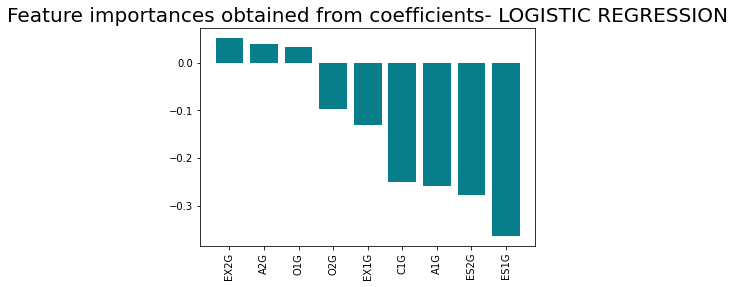

  Feature Importance
5    ES1G    0.22008
2     A1G   0.161914
4     C1G   0.146109
6    ES2G   0.146043
0    EX1G   0.087475
8     O2G    0.07593
7     O1G   0.058984
3     A2G   0.052429
1    EX2G   0.051036


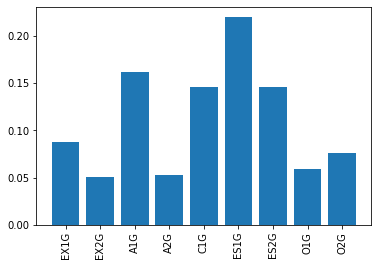

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


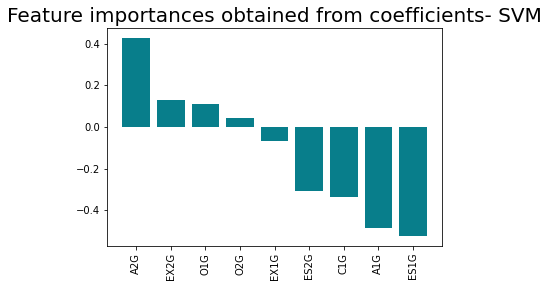

BF_df_V
[1, 2, 3, 4, 6, 7, 8, 9, 10]


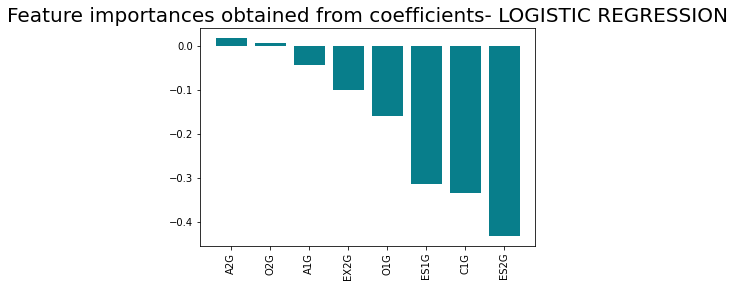

  Feature Importance
5    ES2G   0.291373
4    ES1G    0.19254
3     C1G   0.152187
6     O1G   0.082885
1     A1G   0.079785
0    EX2G   0.071792
7     O2G   0.068555
2     A2G   0.060881


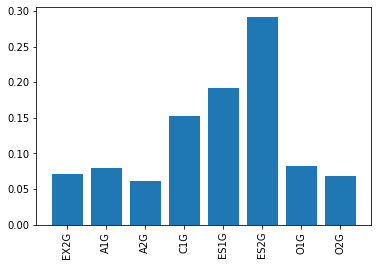

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


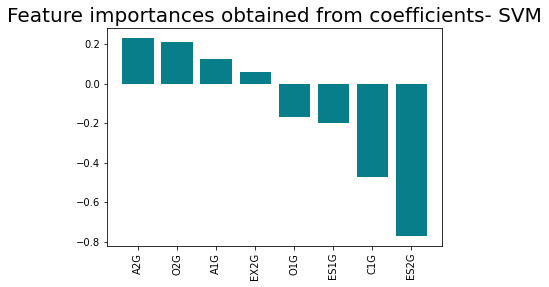

IESR_df
[8, 10, 13, 16, 18, 21, 22]


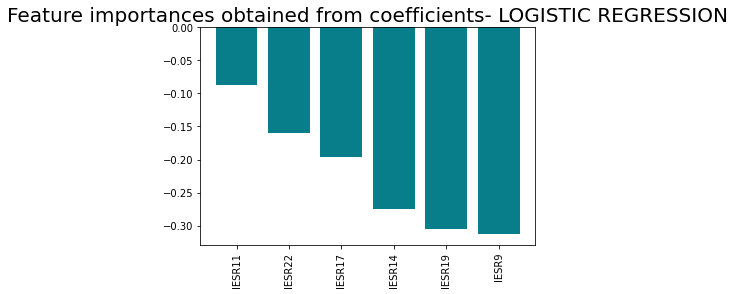

  Feature Importance
0   IESR9   0.285382
2  IESR14   0.255034
4  IESR19   0.253441
3  IESR17   0.112531
5  IESR22   0.054866
1  IESR11   0.038746


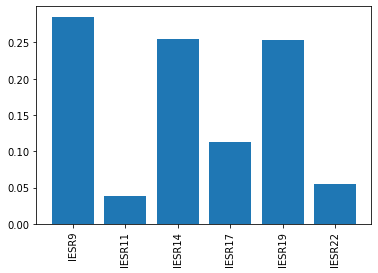

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


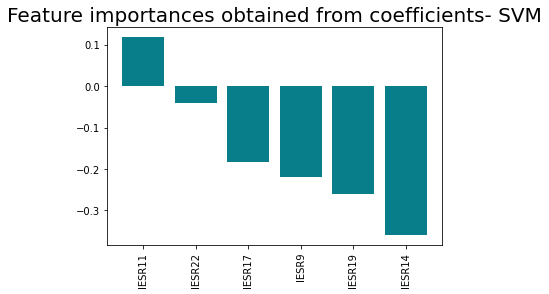

PCL5_df
[1, 3, 4, 10, 12, 20]


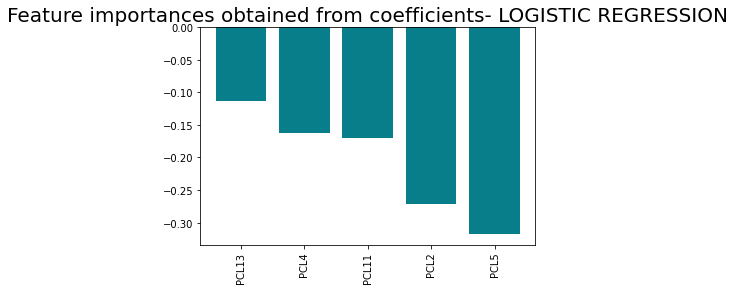

  Feature Importance
0    PCL2   0.291109
2    PCL5    0.24327
3   PCL11    0.18705
1    PCL4   0.152922
4   PCL13    0.12565


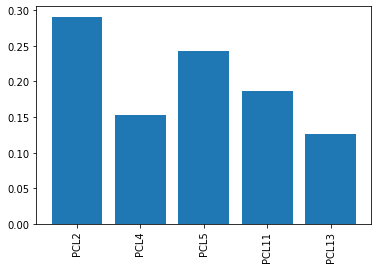

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


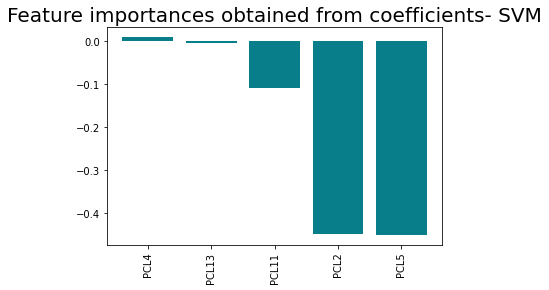

PHQ9_GAD7_df
[1, 2, 6, 7, 8, 13, 16]


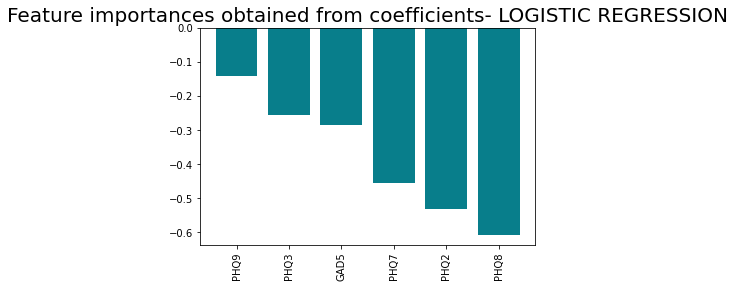

  Feature Importance
3    PHQ8   0.371373
0    PHQ2   0.302289
2    PHQ7   0.195588
5    GAD5   0.065109
1    PHQ3   0.053018
4    PHQ9   0.012623


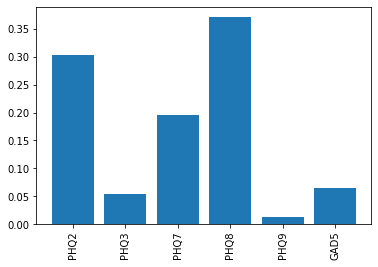

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


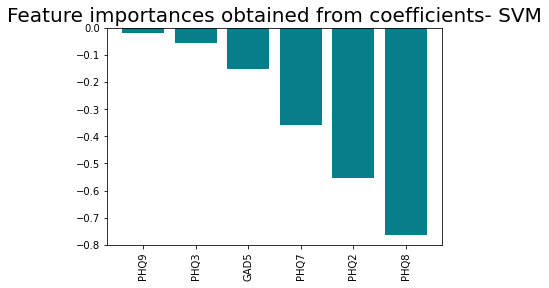

PRMQ_df
[1, 2, 5, 6, 7, 10, 12, 14, 16]


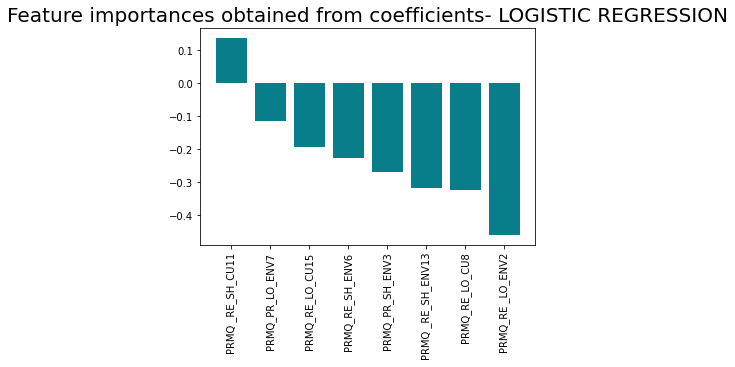

             Feature Importance
0   PRMQ_RE _LO_ENV2   0.218299
4     PRMQ_RE_LO_CU8   0.189241
7    PRMQ_RE_LO_CU15   0.128127
1    PRMQ_PR_SH_ENV3   0.119704
2    PRMQ_RE_SH_ENV6   0.118786
6  PRMQ _RE_SH_ENV13   0.098118
3    PRMQ_PR_LO_ENV7   0.075065
5   PRMQ _RE_SH_CU11    0.05266


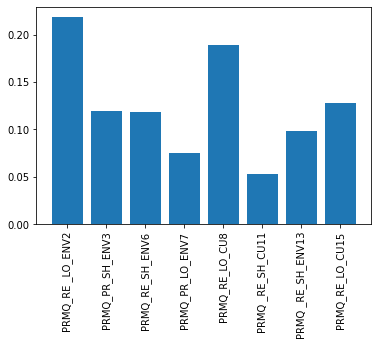

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


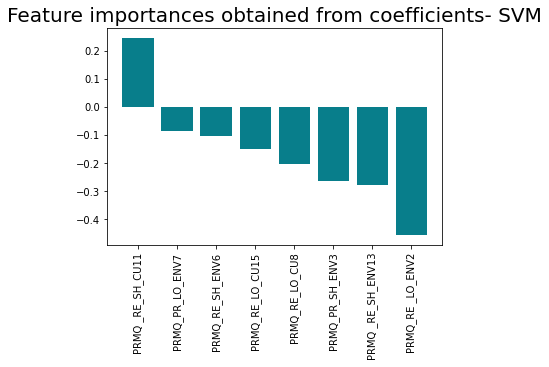

{'BF_df_CTU': [0.8045112781954887, 0.8195488721804511, 0.7819548872180451], 'BF_df_V': [0.7534246575342466, 0.7465753424657534, 0.7123287671232876], 'IESR_df': [0.9074074074074074, 0.8981481481481481, 0.9259259259259259], 'PCL5_df': [0.7933884297520661, 0.7768595041322314, 0.8347107438016529], 'PHQ9_GAD7_df': [0.9761904761904762, 0.9702380952380952, 0.9761904761904762], 'PRMQ_df': [0.9004739336492891, 0.919431279620853, 0.9028436018957346]}


In [ ]:
data = {}
results_acc = pca_ds_acc(dfs,dfs_names,data)
print(results_acc)

In [ ]:
acc_df = pd.DataFrame(results_acc)
acc_df

,BF_df_CTU,BF_df_V,IESR_df,PCL5_df,PHQ9_GAD7_df,PRMQ_df
0,0.804511,0.753425,0.907407,0.793388,0.976190,0.900474
1,0.819549,0.746575,0.898148,0.776860,0.970238,0.919431
2,0.781955,0.712329,0.925926,0.834711,0.976190,0.902844


In [ ]:
mean_acc_df = acc_df.mean()
mean_acc_df

BF_df_CTU       0.802005
BF_df_V         0.737443
IESR_df         0.910494
PCL5_df         0.801653
PHQ9_GAD7_df    0.974206
PRMQ_df         0.907583
dtype: float64

In [ ]:
X_axis = np.arange(len(dfs_names))
X_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
std_acc = acc_df.std()
std_acc

BF_df_CTU       0.024170
BF_df_OU        0.025102
BF_df_V         0.011863
DT_df_CC        0.027872
DF_df_JI        0.011750
IADQ_df         0.004277
IESR_df         0.016038
NAQ_R_df        0.000000
PCL5_df         0.029798
PHQ9_GAD7_df    0.003437
PID5_df         0.016788
PRFQ_df         0.010204
PRMQ_df         0.010329
R_NEO_PI        0.020013
RAQ_DDDT        0.008502
sPID-5_df       0.001850
dtype: float64

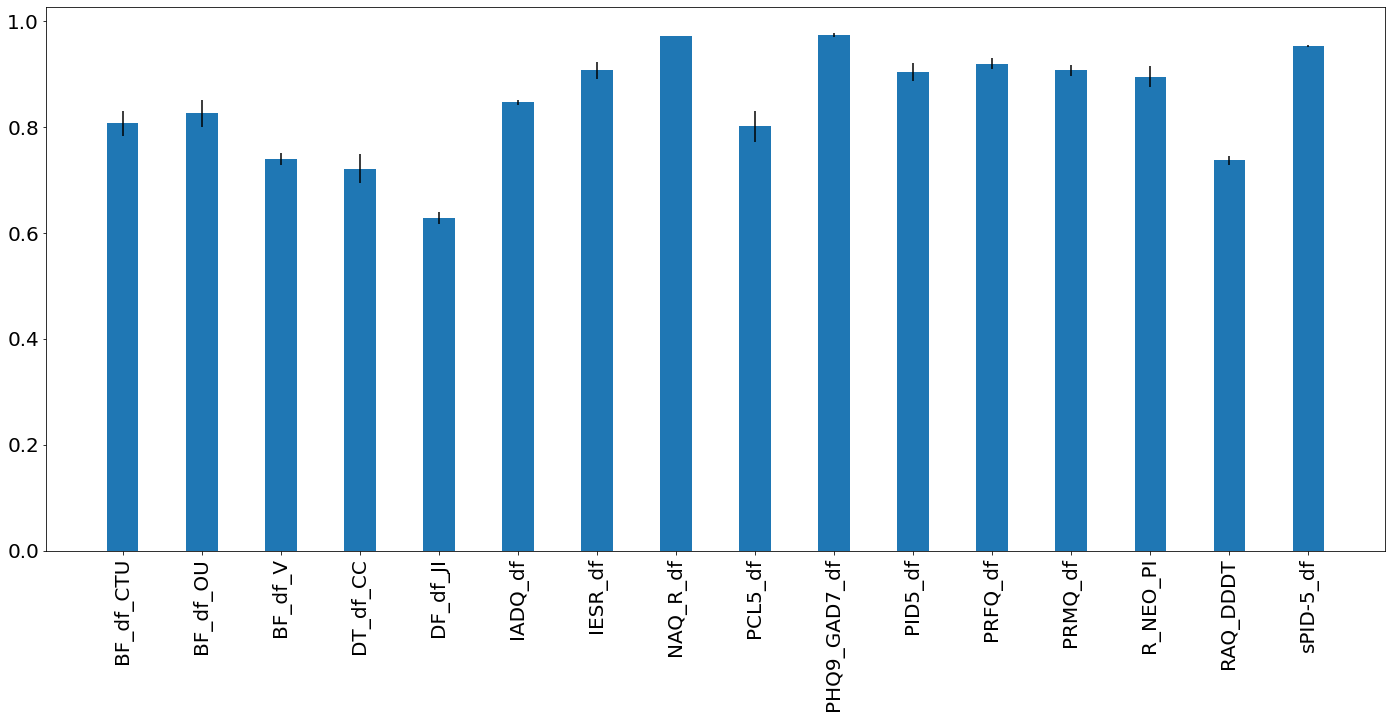

In [ ]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.bar(X_axis, mean_acc_df,0.4, yerr = std_acc)
plt.xticks(X_axis, dfs_names, rotation=90)
plt.show()